In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Diwali Sales Data.csv', encoding= 'unicode_escape')
data.shape


(11251, 15)

In [4]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
data.drop(['Status','unnamed1'],axis=1,inplace=True)

In [7]:
pd.isnull(data).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
 data.dropna(inplace=True)

In [9]:
pd.isnull(data).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [10]:
data['Amount']=data['Amount'].astype('int')

In [11]:
data['Amount'].dtype

dtype('int64')

In [12]:
data.rename(columns={'Marital_Status':'Life_Status'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Life_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [13]:
 data[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# **Exploratory Data Analysis**

## Gender

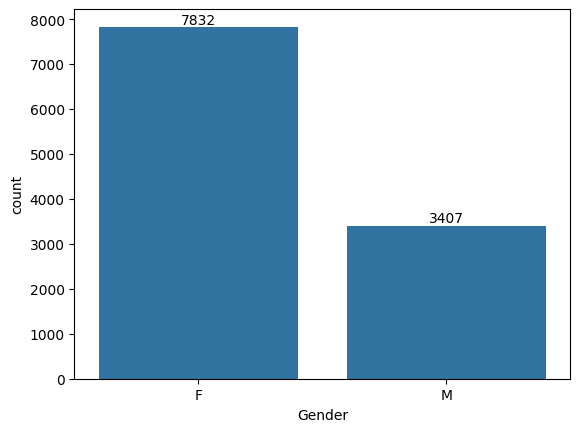

In [14]:
a=sns.countplot(x='Gender',data=data)
for bars in a.containers:
  a.bar_label(bars)
plt.show()

In [15]:
sales_gender=data.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sales_gender

,Gender,Amount
0,F,74335853
1,M,31913276


<ipython-input-16-79f5feb9648b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender',y='Amount',data=sales_gender,palette={'F': 'pink', 'M': 'blue'})


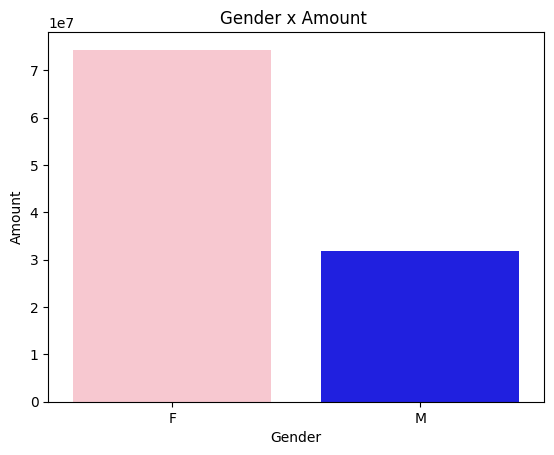

In [16]:
sales_gender=data.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Gender',y='Amount',data=sales_gender,palette={'F': 'pink', 'M': 'blue'})
plt.title('Gender x Amount ')
plt.show()

From the above analysis, there is an indication that women spent more on shopping compared to men,thus the have greater purchasing power

##Age


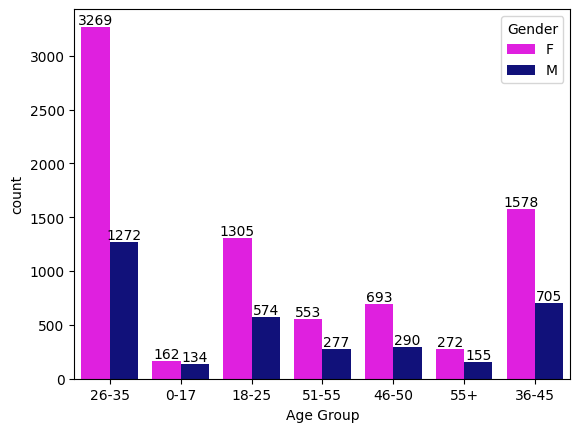

In [17]:
d=sns.countplot(x='Age Group',hue='Gender',data=data,palette= {'F':'magenta','M':'darkblue'})
for bars in d.containers:
  d.bar_label(bars)
plt.show()

<ipython-input-18-4a9c1834d59d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Group',y='Amount',data=sales_age,palette='muted')


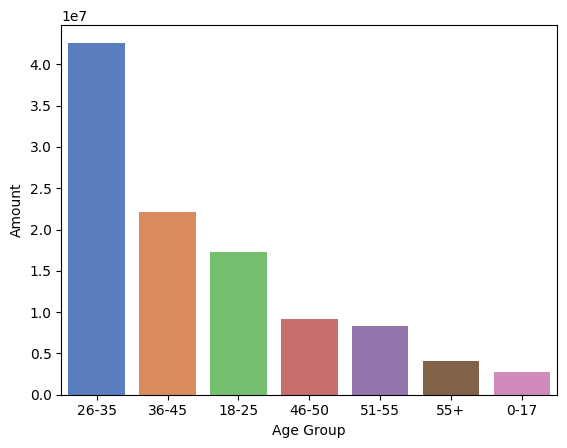

In [18]:
sales_age=data.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount',data=sales_age,palette='muted')
plt.show()

From above graph it is clearly visible that most of the buyer are of the age  group of(26-35)female

## State

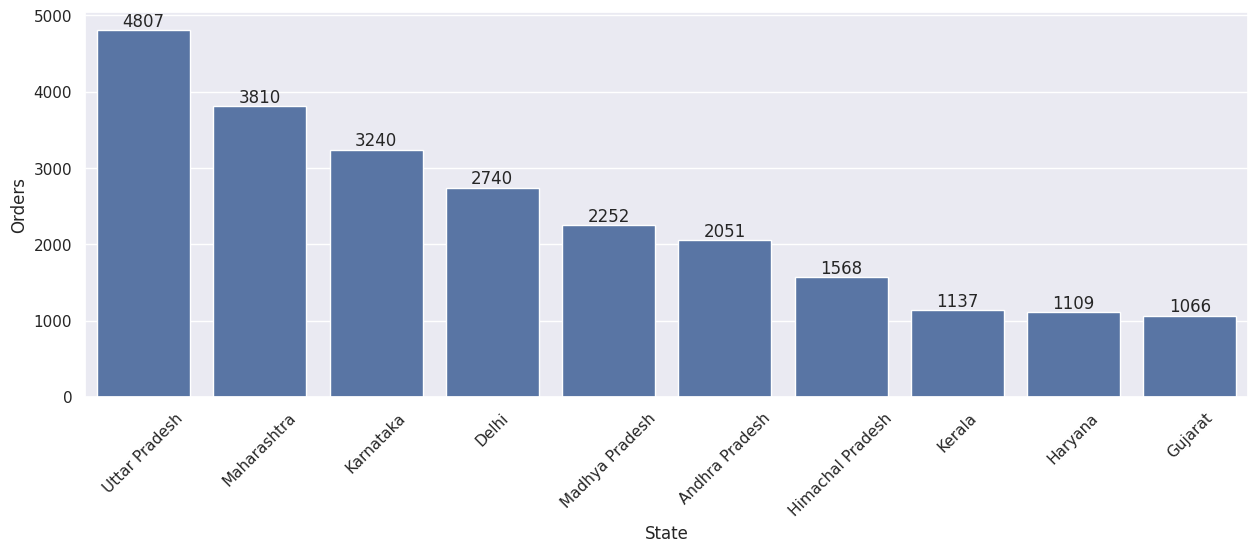

In [19]:
#Total Numbers of order from top 10 state
Sales_state=data.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
a=sns.barplot(x='State',y='Orders',data=Sales_state)
for bars in a.containers:
  a.bar_label(bars)
plt.xticks(rotation=45)
plt.show()

<ipython-input-20-06211d18cd05>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a=sns.barplot(x='State',y='Amount',data=sales_state,palette="mako")


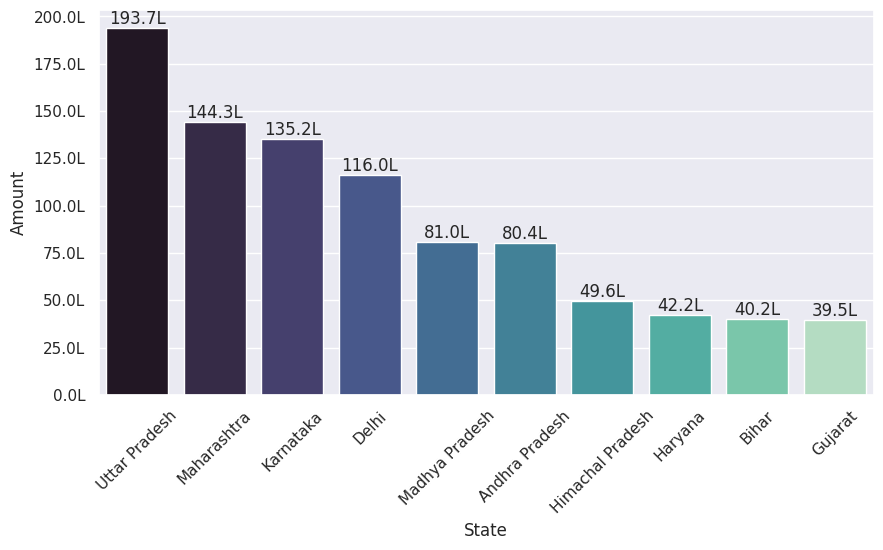

In [20]:
#total Amounts/sales from top 10 states
from matplotlib.ticker import FuncFormatter
sales_state=data.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(10,5)})

a=sns.barplot(x='State',y='Amount',data=sales_state,palette="mako")
#To chnage the graph bins in lac
def Lac(x, pos):
    'The two args are the value and tick position'
    return '%1.1fL' % (x * 1e-5)
formatter = FuncFormatter(Lac)
plt.gca().yaxis.set_major_formatter(formatter)
#To get excat Number in graph
for bars in a.containers:
  labels = [f'{x/100000:.1f}L' for x in bars.datavalues]
  a.bar_label(bars, labels=labels)

plt.xticks(rotation=45)
plt.show()


## Marital Status

<ipython-input-29-74365d9968dd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a=sns.countplot(x='Marital_Status',data=data,palette='YlOrBr')
<ipython-input-29-74365d9968dd>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels(['Married','Single'])


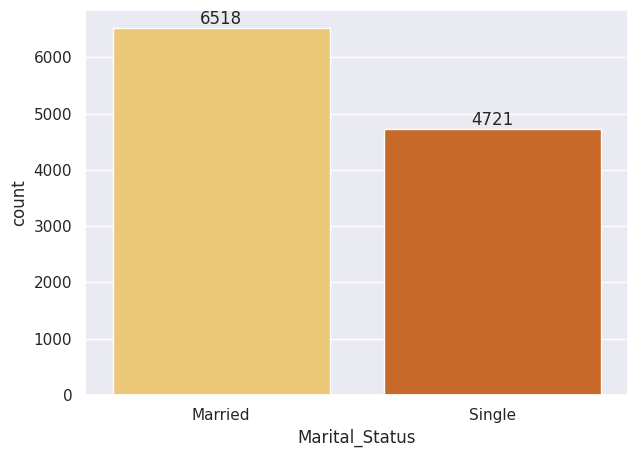

In [29]:
sns.set(rc={'figure.figsize':(7,5)})
a=sns.countplot(x='Marital_Status',data=data,palette='YlOrBr')
a.set_xticklabels(['Married','Single'])
for bars in a.containers:
  a.bar_label(bars)
plt.show()

<ipython-input-39-a717cf0fddc2>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels(['Married','Single'])


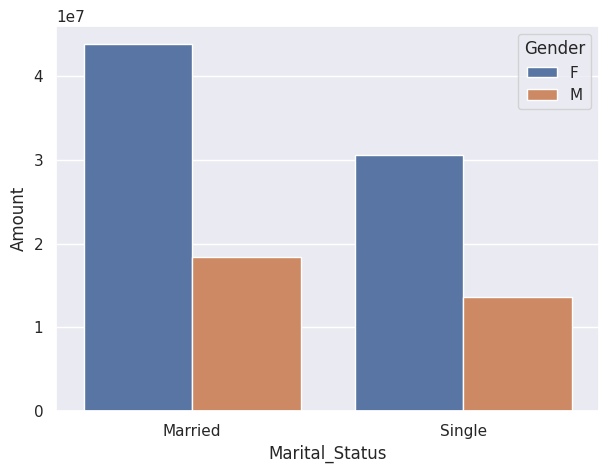

In [39]:
sales_status=data.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
a=sns.barplot(x='Marital_Status',y='Amount',data=sales_status,hue='Gender')
a.set_xticklabels(['Married','Single'])
plt.show()

In [42]:
sales_status=data.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sales_status

,Marital_Status,Gender,Amount
0,0,F,43786646
2,1,F,30549207
1,0,M,18338738
3,1,M,13574538


**From above graph we can see that most of the buyers are married(women) and they have a high purchasing power**

## Occupation

<ipython-input-75-320ef53228cf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ac=sns.countplot(x='Occupation',data=data,palette="tab10")


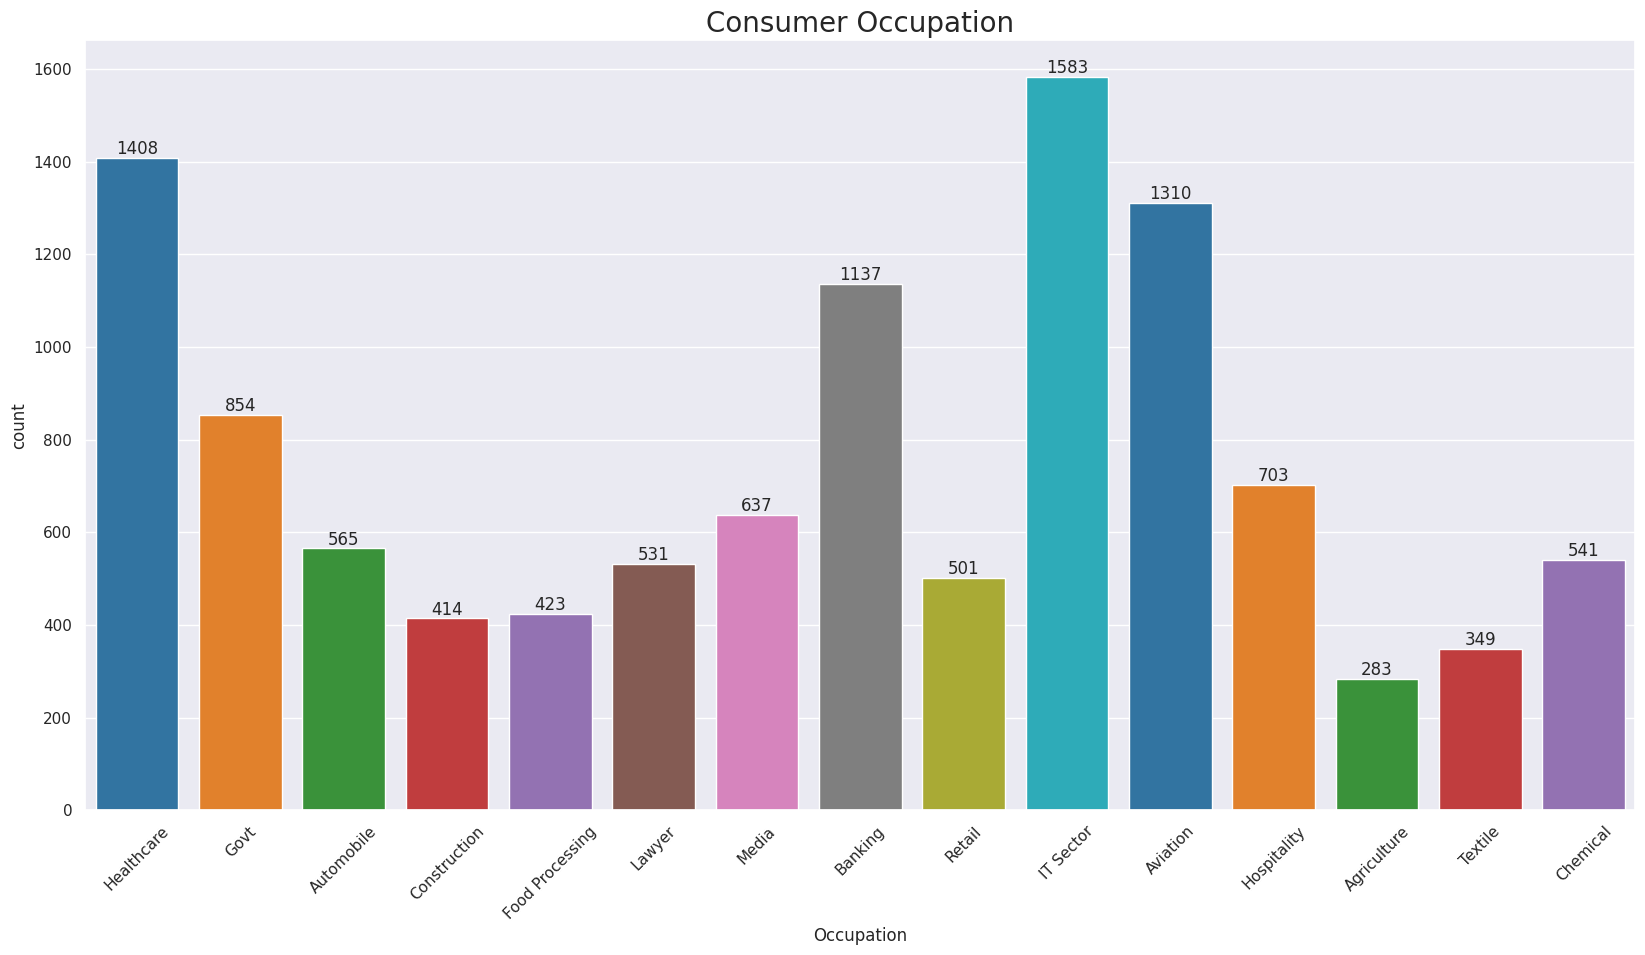

In [75]:
sns.set(rc={'figure.figsize':(20,10)})
ac=sns.countplot(x='Occupation',data=data,palette="tab10")
for bars in ac.containers:
  ac.bar_label(bars)
plt.xticks(rotation=45)
plt.title('Consumer Occupation',size=20)
plt.show()

<ipython-input-74-403856a0ef9d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a=sns.barplot(x='Occupation', y='Amount', data=sales_occupation, palette="tab10")


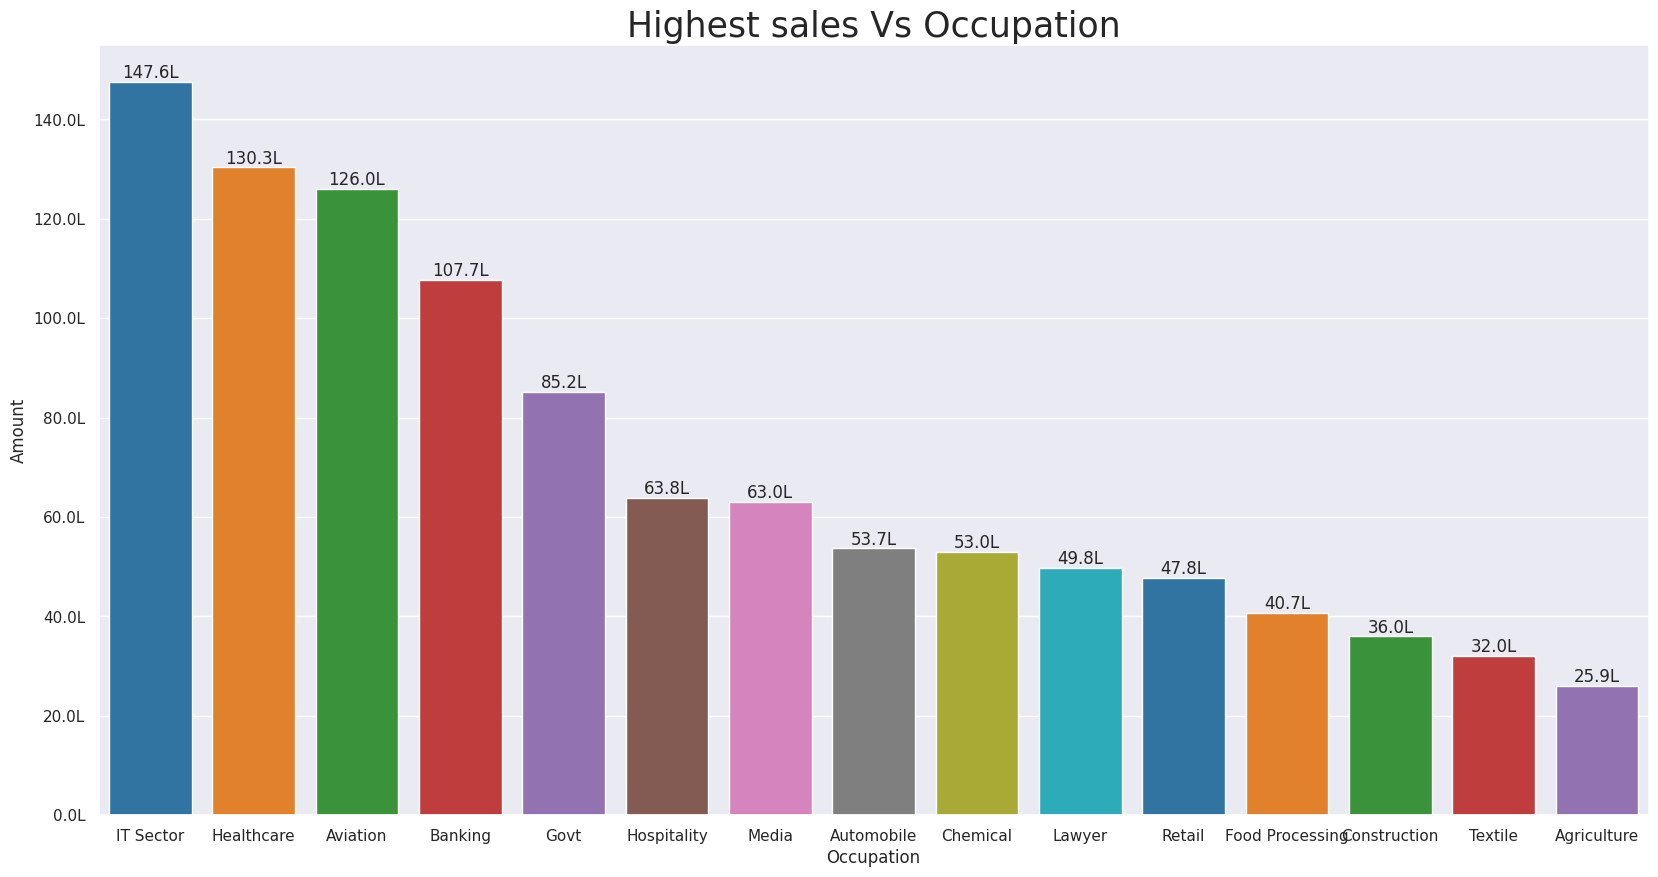

In [74]:
sales_occupation = data.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
a=sns.barplot(x='Occupation', y='Amount', data=sales_occupation, palette="tab10")
def Lac(x,pos):
  'The two args'
  return '%1.1fL' % (x * 1e-5)
formatter=FuncFormatter(Lac)
plt.gca().yaxis.set_major_formatter(formatter)
#To get excat Number in graph
for bars in a.containers:
  labels = [f'{x/100000:.1f}L' for x in bars.datavalues]
  a.bar_label(bars, labels=labels)
  plt.title("Highest sales Vs Occupation",size=25)
plt.show()

From the above we can see that most of the buyers are from the IT SECTOR,HEALTHCARE,AVIATION.


## Product Category

<ipython-input-80-3bbee9fea730>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a=sns.countplot(x='Product_Category',data=data,palette='tab10')


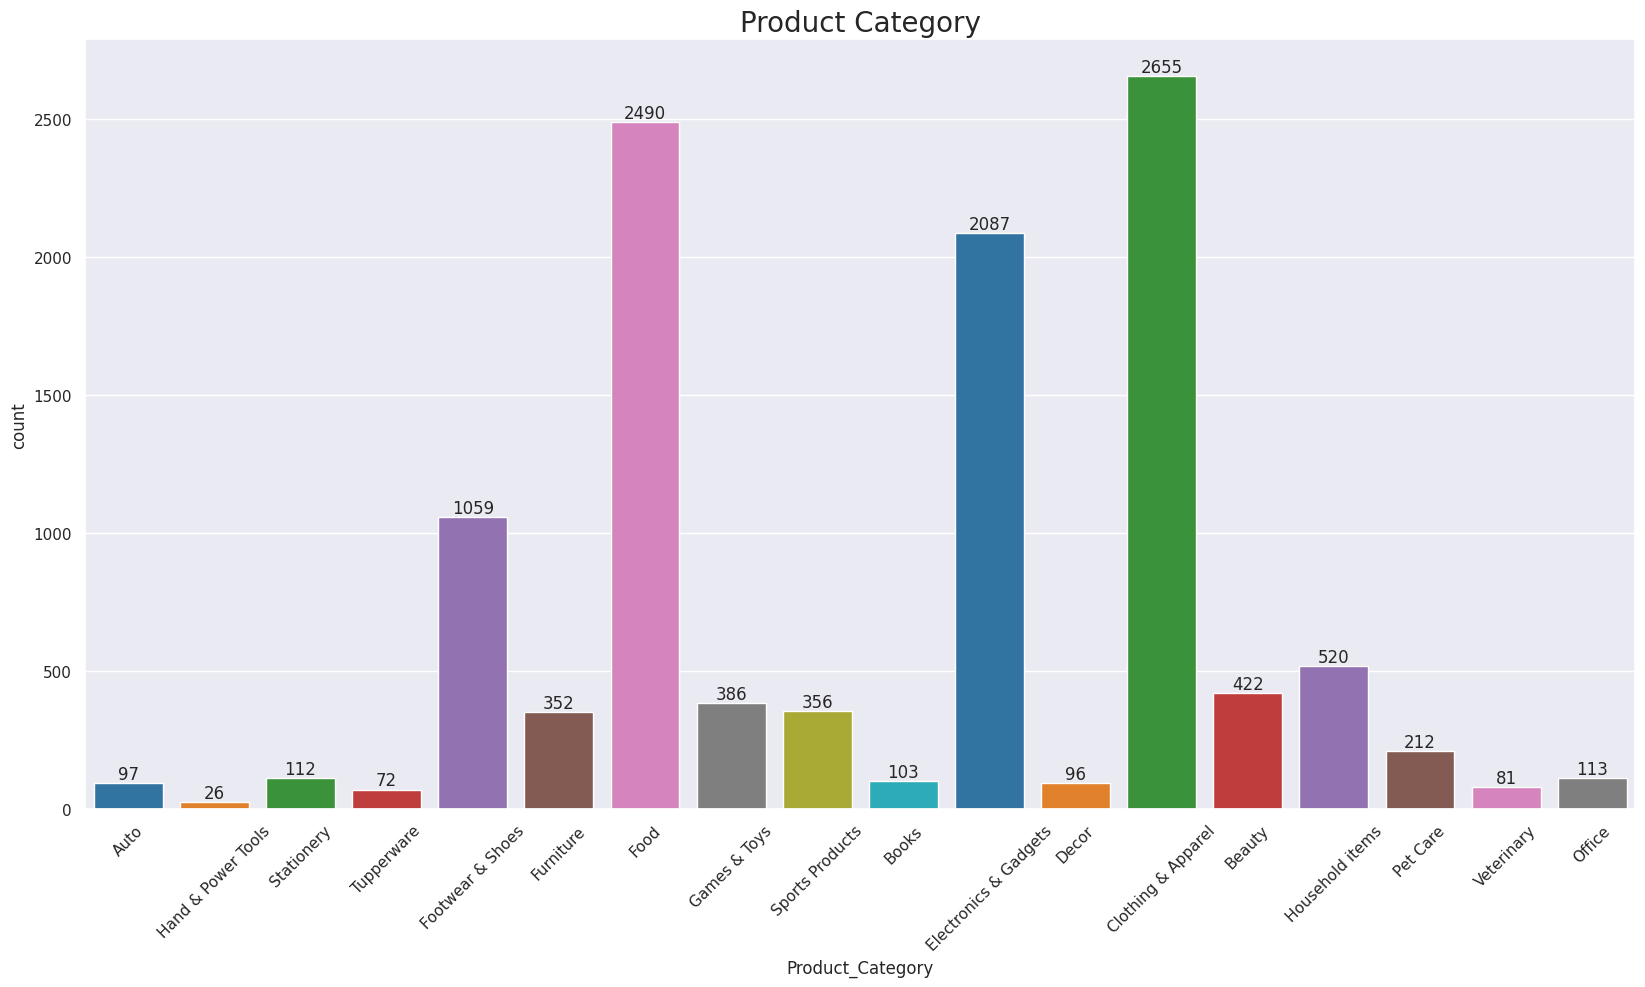

In [80]:
sns.set(rc={'figure.figsize':(20,10)})
a=sns.countplot(x='Product_Category',data=data,palette='tab10')
for bars in a.containers:
  a.bar_label(bars)
plt.xticks(rotation=45)
plt.title('Product Category',size=20)
plt.show()

<ipython-input-97-40bd72552844>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a=sns.barplot(x='Product_Category',y='Amount',data=sales_product,palette='tab10')


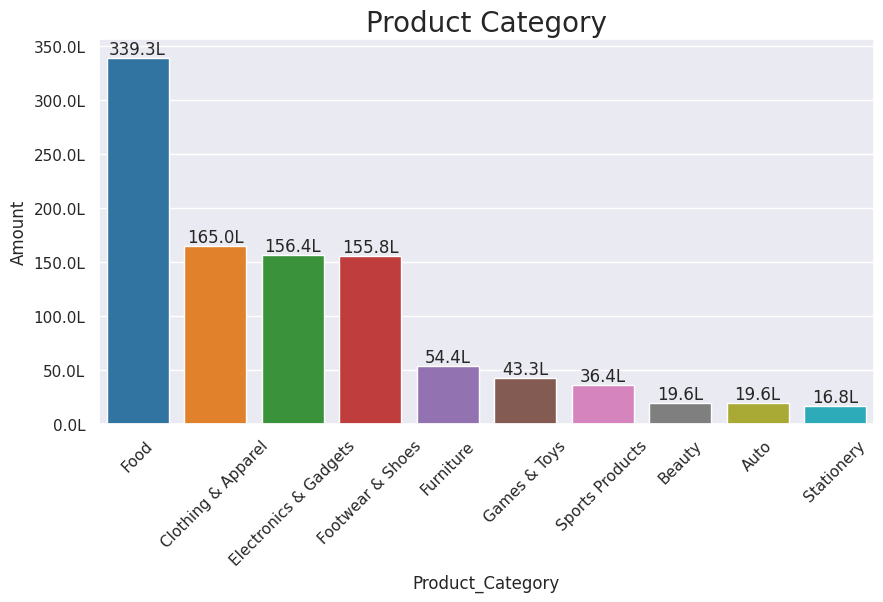

In [97]:
sales_product=data.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(10,5)})
a=sns.barplot(x='Product_Category',y='Amount',data=sales_product,palette='tab10')
def Lac(x,pos):
  'The two args'
  return '%1.1fL' % (x * 1e-5)
formatter=FuncFormatter(Lac)
plt.gca().yaxis.set_major_formatter(formatter)
#To get excat Number in graph
for bars in a.containers:
  labels=[f'{x/100000:.1f}L' for x in bars.datavalues]
  a.bar_label(bars,labels=labels)
plt.xticks(rotation=45)
plt.title('Product Category',size=20)
plt.show()


From the above graph we can see that most of the sold item are from Food,Clothing&Apparel,Electronics

<Axes: xlabel='Product_ID'>

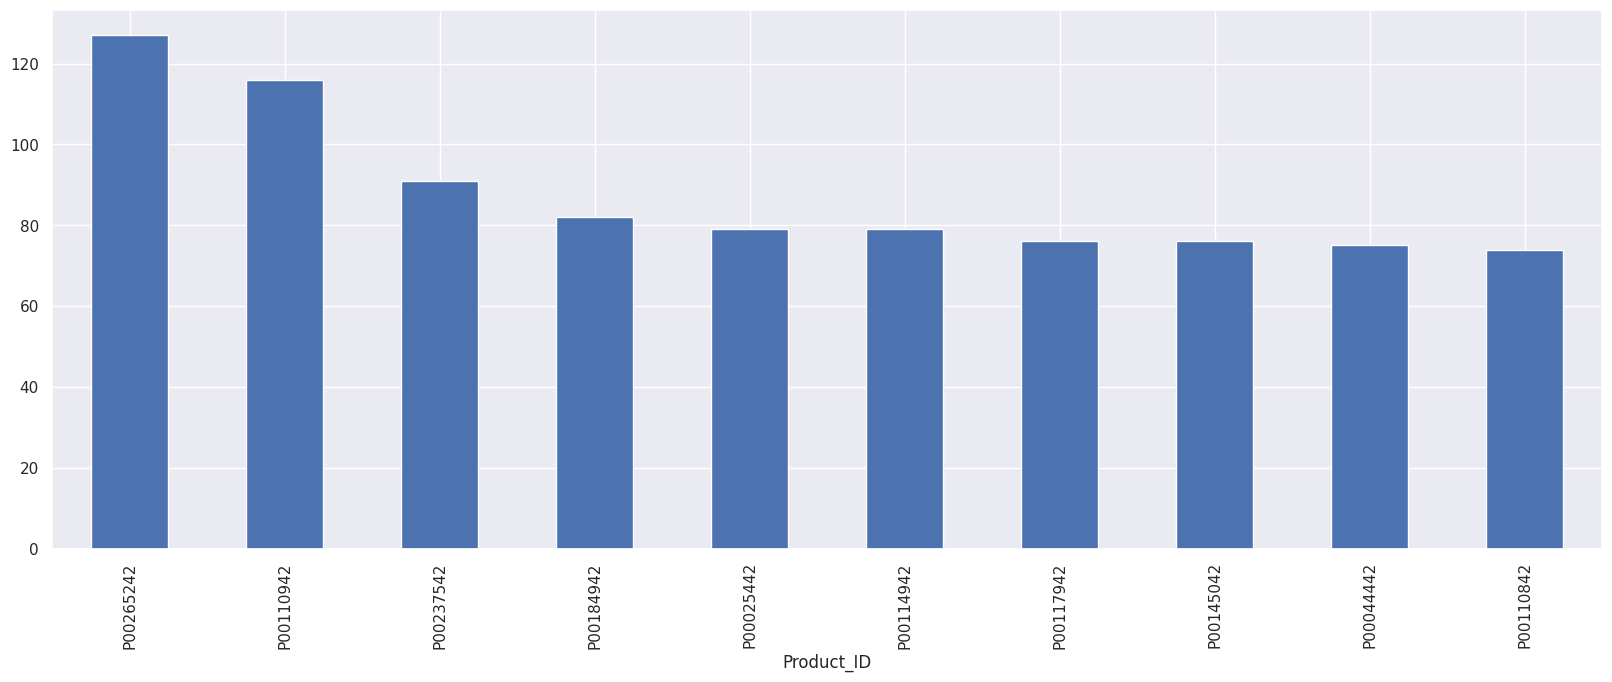

In [96]:
fig1,ax1 = plt.subplots(figsize=(20,7))
data.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

# **Conclusion**

### Married women age group 26-35yrs from UP,Maharastra,Karnataka working in IT,Healthcare,Aviation are more likely to buy the product Food,Clothing,Electronics Category
